# 4.10 Coding Etiquette & Excel Reporting Part 2

# Contents:
1. Import libraries and data
2. Data wrangling
3. merge department data with current data set
4. creating crosstabs and visualizations
5. Exporting visualizations
6. Exporting final data set

# 1. Importing Libraries and Data

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
# Path to data folder

path = r'C:\Users\justi\OneDrive\Desktop\Class work\Achievement 4 Python (Instacart Basket Analysis)\02 Data'

In [3]:
# Import departments_wrangled data frame

df_dep = pd.read_csv(os.path.join(path, 'prepared data', 'departments_wrangled.csv'))

In [4]:
df = pd.read_pickle(os.path.join(path, 'prepared data', 'merged_data_with_customer_profiles_1.pkl'))

# 2. Data Wrangling

In [5]:
# Check
df_dep

,Unnamed: 0,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


In [6]:
# Check
df

,user_id,Gender,STATE,Age,date_joined,n_dependants,income,Unnamed: 0_x,order_id,order_number,...,loyalty_flag,avg_prices,spending_flag,order_frequency,frequency_flag,Region,customer_activity,age_flag,income_flag,family_flag
0,26711,Female,Missouri,48,1/1/2017,3,165665,443895,2543867,5,...,New Customer,7.988889,Low Spender,19.0,Regular Customer,Region 2,High,Middle Aged,Middle Income,Family
1,26711,Female,Missouri,48,1/1/2017,3,165665,443897,1285508,7,...,New Customer,7.988889,Low Spender,19.0,Regular Customer,Region 2,High,Middle Aged,Middle Income,Family
2,26711,Female,Missouri,48,1/1/2017,3,165665,443898,2578584,8,...,New Customer,7.988889,Low Spender,19.0,Regular Customer,Region 2,High,Middle Aged,Middle Income,Family
3,26711,Female,Missouri,48,1/1/2017,3,165665,443892,423547,2,...,New Customer,7.988889,Low Spender,19.0,Regular Customer,Region 2,High,Middle Aged,Middle Income,Family
4,26711,Female,Missouri,48,1/1/2017,3,165665,443893,2524893,3,...,New Customer,7.988889,Low Spender,19.0,Regular Customer,Region 2,High,Middle Aged,Middle Income,Family
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30629736,80148,Female,New York,55,4/1/2020,1,57095,1334022,2859858,3,...,New Customer,3.886667,Low Spender,12.0,Regular Customer,Region 1,Low,Middle Aged,Middle Income,Family
30629737,80148,Female,New York,55,4/1/2020,1,57095,1334022,2859858,3,...,New Customer,3.886667,Low Spender,12.0,Regular Customer,Region 1,Low,Middle Aged,Middle Income,Family
30629738,80148,Female,New York,55,4/1/2020,1,57095,1334023,3209855,4,...,New Customer,3.886667,Low Spender,12.0,Regular Customer,Region 1,Low,Middle Aged,Middle Income,Family
30629739,80148,Female,New York,55,4/1/2020,1,57095,1334022,2859858,3,...,New Customer,3.886667,Low Spender,12.0,Regular Customer,Region 1,Low,Middle Aged,Middle Income,Family


In [7]:
# Rename unknown column to department_id
df_dep.rename(columns = {'Unnamed: 0' : 'department_id'}, inplace = True)

In [8]:
df_dep

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


# 3. Merging Data

In [9]:
# Merge data sets
df_merged = df.merge(df_dep, on = 'department_id')

In [10]:
# Check
df_merged.head()

,user_id,Gender,STATE,Age,date_joined,n_dependants,income,Unnamed: 0_x,order_id,order_number,...,avg_prices,spending_flag,order_frequency,frequency_flag,Region,customer_activity,age_flag,income_flag,family_flag,department
0,26711,Female,Missouri,48,1/1/2017,3,165665,443895,2543867,5,...,7.988889,Low Spender,19.0,Regular Customer,Region 2,High,Middle Aged,Middle Income,Family,beverages
1,26711,Female,Missouri,48,1/1/2017,3,165665,443897,1285508,7,...,7.988889,Low Spender,19.0,Regular Customer,Region 2,High,Middle Aged,Middle Income,Family,beverages
2,26711,Female,Missouri,48,1/1/2017,3,165665,443898,2578584,8,...,7.988889,Low Spender,19.0,Regular Customer,Region 2,High,Middle Aged,Middle Income,Family,beverages
3,33890,Female,New Mexico,36,1/1/2017,0,59285,562335,1044841,3,...,7.057534,Low Spender,26.0,Non-Frequent Customer,Region 4,High,Adult,Middle Income,Single,beverages
4,33890,Female,New Mexico,36,1/1/2017,0,59285,562336,474720,4,...,7.057534,Low Spender,26.0,Non-Frequent Customer,Region 4,High,Adult,Middle Income,Single,beverages


In [11]:
# Check
df_merged.shape

(30629741, 38)

# 4. Creating Crosstabs and Visualizations

In [12]:
# age and department crosstab
age_department = pd.crosstab(df_merged['department'], df_merged['age_flag'], dropna = False)

In [13]:
# Check
age_department

age_flag,Adult,Middle Aged,Senior,Young Adult
department,,,,
alcohol,42978,47074,36799,19684
babies,119600,127703,103235,49840
bakery,330268,347446,292176,138650
beverages,745519,804082,675315,315243
breakfast,196732,208370,173632,84516
bulk,9697,10006,8727,4182
canned goods,300988,315948,266240,126484
dairy eggs,1524153,1592587,1346748,637697
deli,296949,311248,262202,123165


In [45]:
# Copy to clipboard
age_department.to_clipboard()

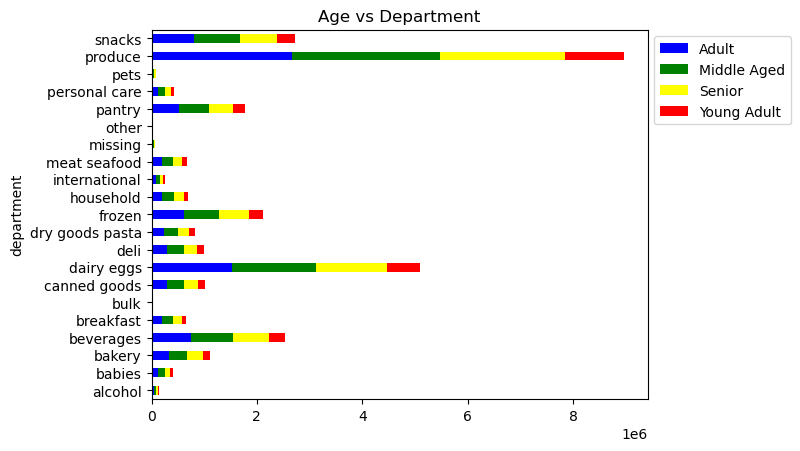

In [14]:
# age vs department bar chart
age_dep_bar_chart = age_department.plot.barh(stacked = True, title = 'Age vs Department', color = {'Young Adult': 'red', 'Adult': 'blue', 'Middle Aged': 'green', 'Senior': 'yellow'})
plt.legend(bbox_to_anchor = (1.0, 1.0))
plt.show()

In [15]:
# income vs dep crosstab
income_department = pd.crosstab(df_merged['department'], df_merged['income_flag'], dropna = False)

In [46]:
# Check
income_department

income_flag,High Income,Low Income,Middle Income
department,,,
alcohol,7002,18451,121082
babies,2296,27947,370135
bakery,14305,108279,985956
beverages,27244,383630,2129285
breakfast,7325,91820,564105
bulk,29,4658,27925
canned goods,10494,81897,917269
dairy eggs,50728,504490,4545967
deli,8332,107822,877410


In [47]:
# Copy to clipboard
income_department.to_clipboard()

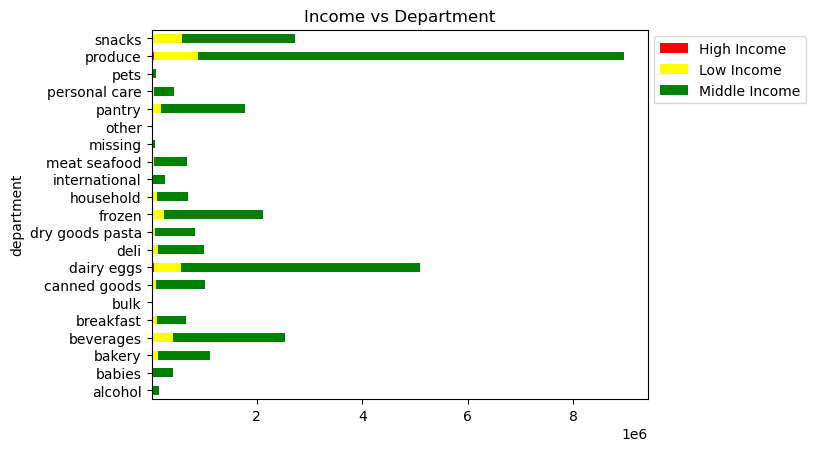

In [16]:
# Income vs dep bar chart
income_dep_bar_chart = income_department.plot.barh(stacked = True, title = 'Income vs Department', color = {'High Income': 'red', 'Middle Income': 'green', 'Low Income': 'yellow'})
plt.legend(bbox_to_anchor = (1.0, 1.0))
plt.show()

In [17]:
# income vs region cross tab
income_region = pd.crosstab(df_merged['Region'], df_merged['income_flag'], dropna = False)

In [48]:
#Check
income_region

income_flag,High Income,Low Income,Middle Income
Region,,,
Region 1,47315,593293,4781417
Region 2,75339,792913,6308672
Region 3,88148,1083294,8428567
Region 4,78240,918058,7434485


In [49]:
# Copy to Clipboard
income_region.to_clipboard()

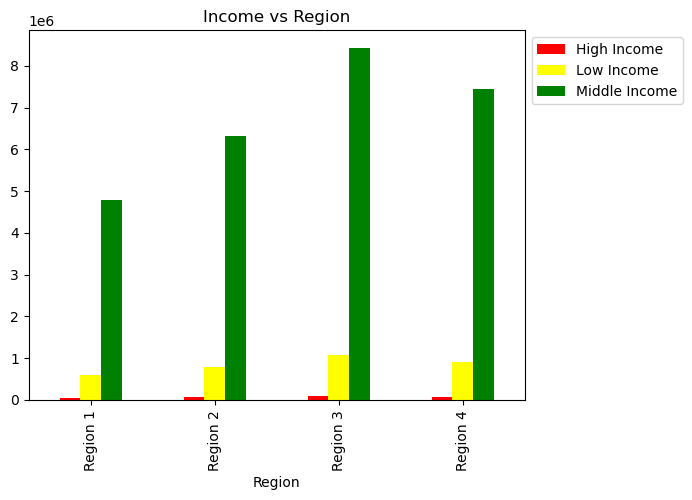

In [18]:
# Income by region bar chart
income_region_bar_chart = income_region.plot.bar(title = 'Income vs Region', color = {'High Income': 'red', 'Middle Income': 'green', 'Low Income': 'yellow'})
plt.legend(bbox_to_anchor = (1.0, 1.0))
plt.show()

In [19]:
# family vs region crosstab
family_region = pd.crosstab(df_merged['Region'], df_merged['family_flag'], dropna = False)

In [51]:
#Check
family_region

family_flag,Family,Single
Region,,
Region 1,4081846,1340179
Region 2,5372803,1804121
Region 3,7216563,2383446
Region 4,6308831,2121952


In [52]:
# Copy to Clipboard
family_region.to_clipboard()

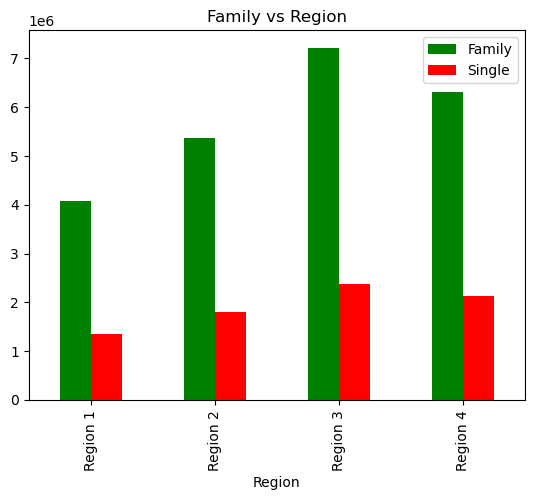

In [20]:
# Family vs region bar chart
family_region_bar_chart = family_region.plot.bar(title = 'Family vs Region', color = {'Single': 'red', 'Family': 'green'})
plt.legend(bbox_to_anchor = (1.0, 1.0))
plt.show()

In [21]:
# Family vs Dep cross tab
family_department = pd.crosstab(df_merged['department'], df_merged['family_flag'], dropna = False)

In [53]:
#Check
family_department

family_flag,Family,Single
department,,
alcohol,109172,37363
babies,299666,100712
bakery,829884,278656
beverages,1902466,637693
breakfast,498023,165227
bulk,24805,7807
canned goods,759298,250362
dairy eggs,3827801,1273384
deli,743439,250125


In [54]:
# Copy to clipboard
family_department.to_clipboard()

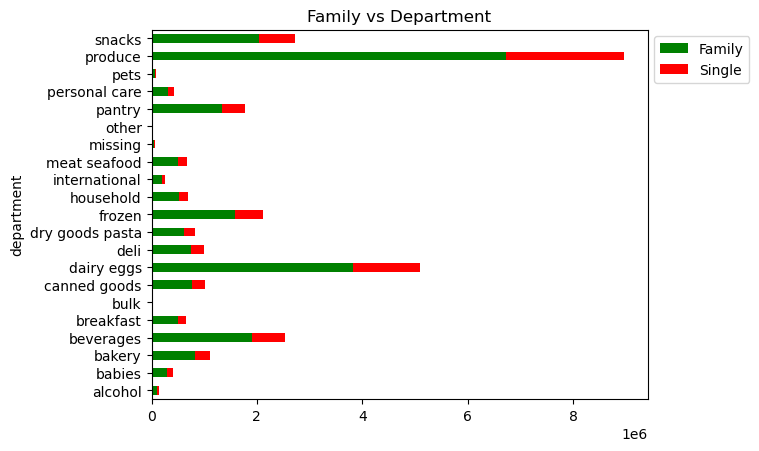

In [22]:
# Family vs region bar chart
family_dep_bar_chart = family_department.plot.barh(stacked = True, title = 'Family vs Department', color = {'Single': 'red', 'Family': 'green'})
plt.legend(bbox_to_anchor = (1.0, 1.0))
plt.show()

In [23]:
# Region order frequency crosstab
Region_order_frequency = pd.crosstab(df_merged['Region'], df_merged['frequency_flag'], dropna = False)


In [57]:
#Check
Region_order_frequency

frequency_flag,Frequent Customers,Non-Frequent Customer,Regular Customer
Region,,,
Region 1,3399588,596612,1425825
Region 2,4451533,816986,1908405
Region 3,6009186,1082997,2507821
Region 4,5296649,946355,2187779


In [58]:
Region_order_frequency.to_clipboard()

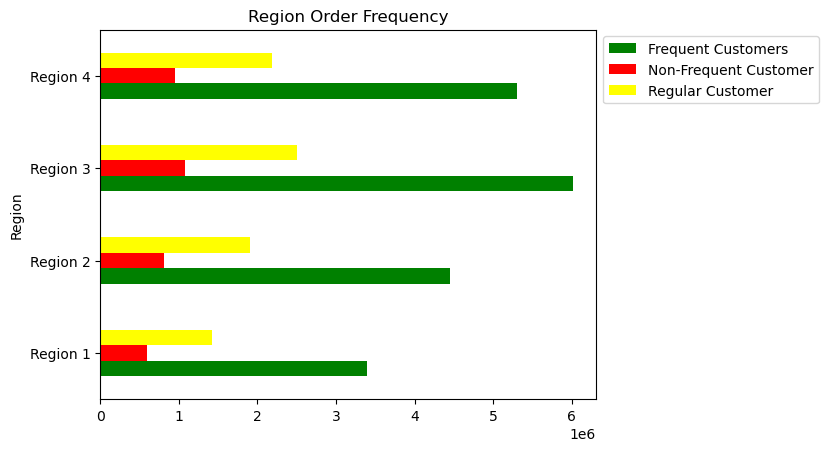

In [24]:
# region order frequency bar
region_order_frequency_bar_chart = Region_order_frequency.plot.barh(title = 'Region Order Frequency', color = {'Frequent Customers' : 'Green', 'Non-Frequent Customer' : 'Red', 'Regular Customer' : 'Yellow'})
plt.legend(bbox_to_anchor = (1.0, 1.0))

In [25]:
# Family order frequency cross tab
family_order_frequency = pd.crosstab(df_merged['frequency_flag'], df_merged['family_flag'], dropna = False)

In [59]:
# Check
family_order_frequency

frequency_flag,Frequent Customers,Non-Frequent Customer,Regular Customer
family_flag,,,
Family,14395823,2593914,5990301
Single,4761133,849036,2039529


In [60]:
# Copy to Clipboard
family_order_frequency.to_clipboard()

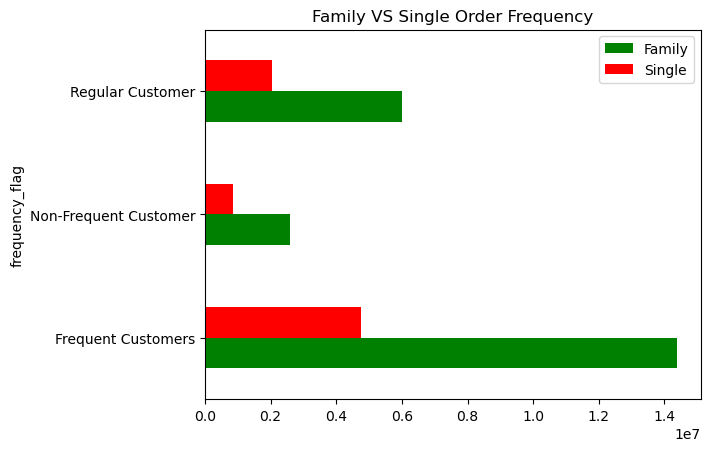

In [26]:
# Family_order_frequency_chart
family_frequency_chart = family_order_frequency.plot.barh(title = 'Family VS Single Order Frequency', color = {'Family' : 'Green', 'Single' : 'Red'})
plt.legend(bbox_to_anchor = (1.0, 1.0))

In [27]:
# Family Loyalty Flag Crosstab
family_loyalty = pd.crosstab(df_merged['family_flag'], df_merged['loyalty_flag'], dropna = False)

In [61]:
# Check
family_loyalty

loyalty_flag,Loyal Customer,New Customer,Regular Customer
family_flag,,,
Family,7268283,4427458,11284302
Single,2439107,1474703,3735888


In [62]:
# Copy to Clipboard
family_loyalty.to_clipboard()

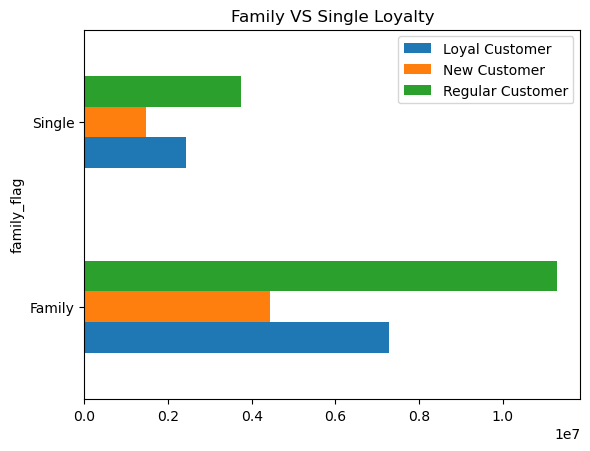

In [28]:
# family loyalty chart
family_loyalty_chart = family_loyalty.plot.barh(title = 'Family VS Single Loyalty')
plt.legend(bbox_to_anchor = (1.0, 1.0))

In [29]:
# Family order frequency cross tab
family_order_frequency = pd.crosstab(df_merged['family_flag'], df_merged['frequency_flag'], dropna = False)

In [63]:
# Check
family_order_frequency

frequency_flag,Frequent Customers,Non-Frequent Customer,Regular Customer
family_flag,,,
Family,14395823,2593914,5990301
Single,4761133,849036,2039529


In [64]:
# Copy to Clipboard
family_order_frequency.to_clipboard()

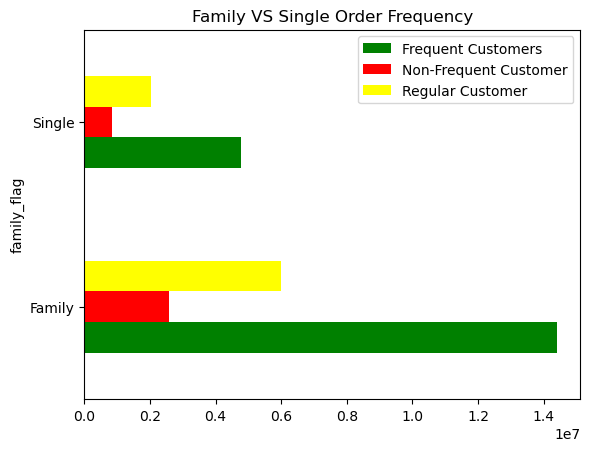

In [30]:
# Family order frequency chart
family_order_frequency_chart = family_order_frequency.plot.barh(title = 'Family VS Single Order Frequency', color = {'Frequent Customers' : 'Green', 'Non-Frequent Customer' : 'Red', 'Regular Customer' : 'Yellow'})
plt.legend(bbox_to_anchor = (1.0, 1.0))

In [31]:
# Income order frequency crosstab
income_order_frequency = pd.crosstab(df_merged['income_flag'], df_merged['frequency_flag'], dropna = False)

In [65]:
# Check
income_order_frequency

frequency_flag,Frequent Customers,Non-Frequent Customer,Regular Customer
income_flag,,,
High Income,191610,22621,74811
Low Income,1993145,469361,925052
Middle Income,16972201,2950968,7029967


In [66]:
# Copy to Clipboard
income_order_frequency.to_clipboard()

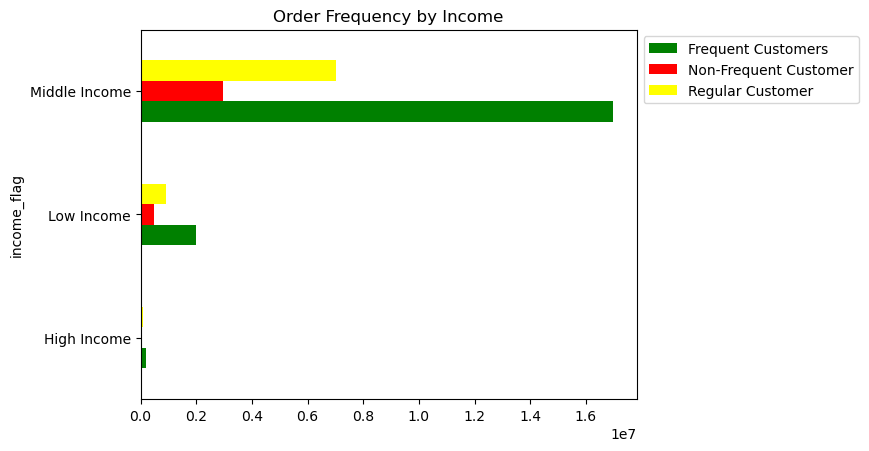

In [32]:
# Income order frequency chart
income_order_frequency_chart = income_order_frequency.plot.barh(title = 'Order Frequency by Income', color = {'Frequent Customers' : 'Green', 'Non-Frequent Customer' : 'Red', 'Regular Customer' : 'Yellow'})
plt.legend(bbox_to_anchor = (1.0, 1.0))

# 5. Exporting Visualizations

In [33]:
#path to visualizations folder
path_2 = r'C:\Users\justi\OneDrive\Desktop\Class work\Achievement 4 Python (Instacart Basket Analysis)\Visualizations'

In [34]:
age_dep_bar_chart.figure.savefig(os.path.join(path_2, 'age_dep_bar_chart.png'), bbox_inches = 'tight')

In [35]:
income_region_bar_chart.figure.savefig(os.path.join(path_2, 'income_region_bar_chart.png'), bbox_inches = 'tight')

In [36]:
income_dep_bar_chart.figure.savefig(os.path.join(path_2, 'income_dep_bar_chart.png'), bbox_inches = 'tight')

In [37]:
family_region_bar_chart.figure.savefig(os.path.join(path_2, 'family_region_bar_chart.png'), bbox_inches = 'tight')

In [38]:
family_dep_bar_chart.figure.savefig(os.path.join(path_2, 'family_dep_bar_chart.png'), bbox_inches = 'tight')

In [39]:
region_order_frequency_bar_chart.figure.savefig(os.path.join(path_2, 'region_order_frequency_bar.png'), bbox_inches = 'tight')

In [40]:
family_frequency_chart.figure.savefig(os.path.join(path_2, 'family_order_frequency_chart.png'), bbox_inches = 'tight')

In [41]:
family_loyalty_chart.figure.savefig(os.path.join(path_2, 'family_loyalty_chart.png'), bbox_inches = 'tight')

In [42]:
income_order_frequency_chart.figure.savefig(os.path.join(path_2, 'income_order_frequency_chart.png'), bbox_inches = 'tight')

In [43]:
family_order_frequency_chart.figure.savefig(os.path.join(path_2, 'family_order_frequency_chart_2.png'), bbox_inches = 'tight')

# 6. Exporting Final Data Set

In [44]:
# Export new data
df_merged.to_pickle(os.path.join(path, 'prepared data','merged_data_with_crosstabs.pkl'))